# Explore Features

In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import numpy as np
%matplotlib inline

In [13]:
df = pd.read_csv('process_data/rate_analytic_zip.csv')
df.head()

,zipcode,DP05_0001E,DP04_0002E,DP03_0005E,DP03_0094E,DP03_0043E,DP03_0006E,DP02_0097E,DP03_0090E,DP05_0074E,...,DP03_0053E,DP04_0004E,DP05_0028E,DP05_0071E,DP02_0128E,DP02_0052E,DP05_0078E,ESTAB_2012,ESTAB_2014,ESTAB_2016
0,1001,-1.375144,-0.256483,18.110236,0.644882,0.974421,42.307692,171.282051,-23.858824,66.666667,...,-7.766990,-100.000000,-1.375144,-2.661597,17.099323,-12.073112,-8.904110,35,36,33
1,1002,3.920886,2.526998,-7.432432,0.029717,25.608856,-100.000000,-22.087379,-9.035618,26.027397,...,-26.908150,-27.777778,3.920886,4.641990,0.166574,5.575996,-0.131234,63,63,58
2,1005,-0.136719,0.879604,-3.114187,-6.515444,-36.607143,-100.000000,45.161290,-19.849976,-22.222222,...,27.777778,30.000000,-0.136719,-0.316331,-31.481481,9.543230,inf,8,9,10
3,1007,1.240321,1.884780,-4.569420,3.203401,10.555556,NaN,-3.246753,-4.503579,NaN,...,-1.111111,-27.272727,1.240321,1.516006,5.678233,6.122967,4.347826,15,17,18
4,1008,4.482759,6.941432,82.142857,9.929671,34.693878,75.000000,-30.000000,26.771272,NaN,...,40.000000,-100.000000,4.482759,5.148342,-6.049822,0.390625,NaN,5,4,5


In [214]:
# df.rename(columns={'Unnamed: 0': 'zipcode'}, inplace=True)

In [14]:
df.set_index('zipcode',inplace=True)
df.head()

,DP05_0001E,DP04_0002E,DP03_0005E,DP03_0094E,DP03_0043E,DP03_0006E,DP02_0097E,DP03_0090E,DP05_0074E,DP02_0127E,...,DP03_0053E,DP04_0004E,DP05_0028E,DP05_0071E,DP02_0128E,DP02_0052E,DP05_0078E,ESTAB_2012,ESTAB_2014,ESTAB_2016
zipcode,,,,,,,,,,,,,,,,,,,,,
1001,-1.375144,-0.256483,18.110236,0.644882,0.974421,42.307692,171.282051,-23.858824,66.666667,62.962963,...,-7.766990,-100.000000,-1.375144,-2.661597,17.099323,-12.073112,-8.904110,35,36,33
1002,3.920886,2.526998,-7.432432,0.029717,25.608856,-100.000000,-22.087379,-9.035618,26.027397,-40.486726,...,-26.908150,-27.777778,3.920886,4.641990,0.166574,5.575996,-0.131234,63,63,58
1005,-0.136719,0.879604,-3.114187,-6.515444,-36.607143,-100.000000,45.161290,-19.849976,-22.222222,7.103825,...,27.777778,30.000000,-0.136719,-0.316331,-31.481481,9.543230,inf,8,9,10
1007,1.240321,1.884780,-4.569420,3.203401,10.555556,NaN,-3.246753,-4.503579,NaN,44.444444,...,-1.111111,-27.272727,1.240321,1.516006,5.678233,6.122967,4.347826,15,17,18
1008,4.482759,6.941432,82.142857,9.929671,34.693878,75.000000,-30.000000,26.771272,NaN,-17.241379,...,40.000000,-100.000000,4.482759,5.148342,-6.049822,0.390625,NaN,5,4,5


In [15]:
#create delta estab 2016-2014, 2016-2012
df['delta_2016_2014'] = (df.ESTAB_2016 - df.ESTAB_2014)*100/df.ESTAB_2014
df['delta_2016_2012'] = (df.ESTAB_2016 - df.ESTAB_2012)*100/df.ESTAB_2012

## Numeric feature correlations

In [16]:
# Calculate correlations between numeric features
correlations = df.corr()
correlations.head()

,DP05_0001E,DP04_0002E,DP03_0005E,DP03_0094E,DP03_0043E,DP03_0006E,DP02_0097E,DP03_0090E,DP05_0074E,DP02_0127E,...,DP05_0028E,DP05_0071E,DP02_0128E,DP02_0052E,DP05_0078E,ESTAB_2012,ESTAB_2014,ESTAB_2016,delta_2016_2014,delta_2016_2012
DP05_0001E,1.000000,0.696238,0.146688,0.002322,0.095700,0.062211,0.038925,0.035919,0.020731,0.066402,...,1.000000,0.853795,0.153362,0.522678,0.053391,0.004445,0.005691,0.007426,0.015444,0.014706
DP04_0002E,0.696238,1.000000,0.090908,0.042702,0.074766,0.042240,0.022900,0.012346,0.017213,0.064703,...,0.696238,0.600015,0.146719,0.284076,0.024625,0.006286,0.008295,0.011141,0.020288,0.022375
DP03_0005E,0.146688,0.090908,1.000000,0.000847,0.013574,0.003522,-0.002260,0.119476,0.003848,0.009853,...,0.146688,0.093805,0.043949,0.090906,0.017828,-0.036649,-0.036298,-0.035984,0.001560,-0.006889
DP03_0094E,0.002322,0.042702,0.000847,1.000000,-0.035586,0.005405,0.018646,0.037205,-0.009219,0.013011,...,0.002322,0.006139,0.031960,-0.008544,0.005026,-0.044897,-0.044699,-0.044353,0.000200,-0.001894
DP03_0043E,0.095700,0.074766,0.013574,-0.035586,1.000000,-0.011535,0.005405,0.016046,0.002956,0.020849,...,0.095700,0.056096,0.003952,0.055958,0.008431,-0.036348,-0.035589,-0.035262,0.001142,-0.000666


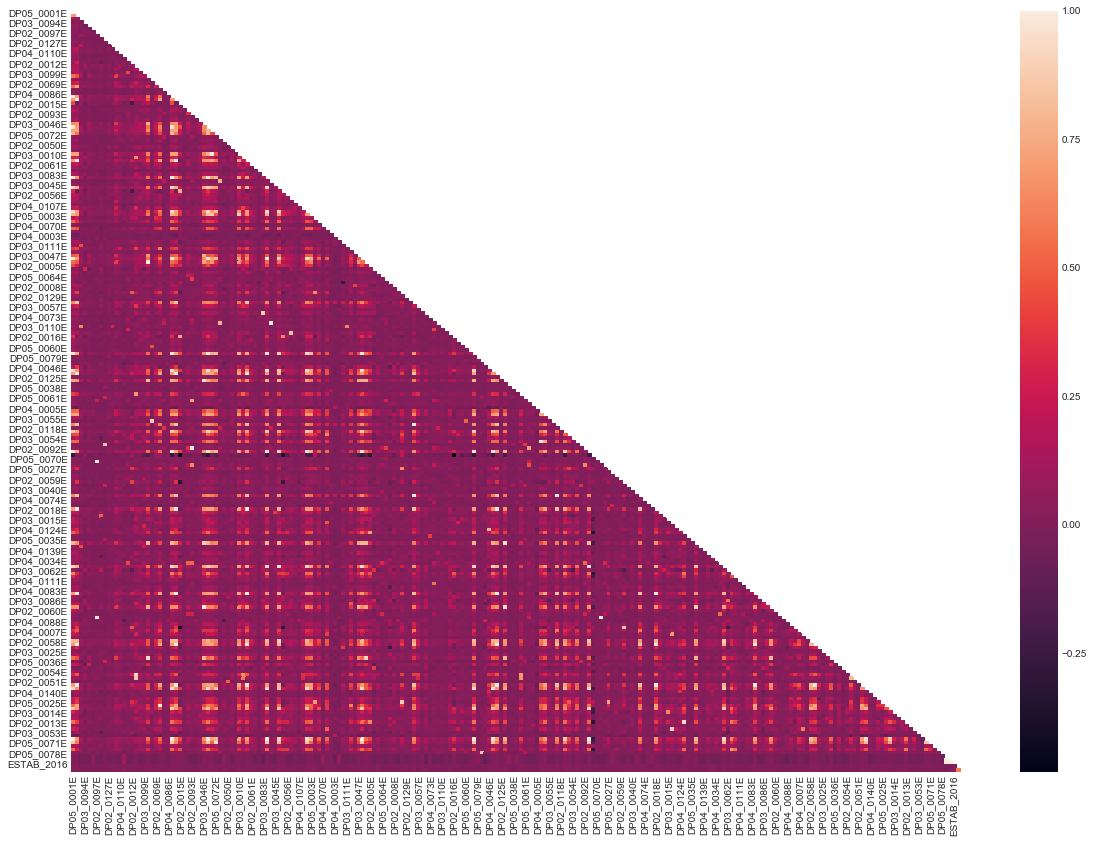

In [17]:
#plot correlation heatmap
sns.set_style('white')

## Generate a mask for the upper triangle
mask = np.zeros_like(correlations, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(20,14))


sns.heatmap(correlations,mask=mask)

** With so many features, it is very hard to see anything. Let's focus on the top feature correlations sorted by correlation values to delta_2016_2012**

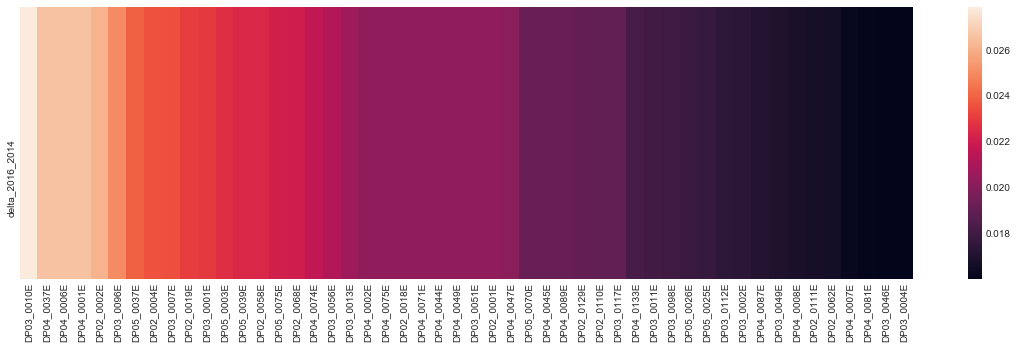

In [18]:
#top_50 correlated variables for 2016_2014
top_50_variable = correlations.sort_values('delta_2016_2014',ascending=False)[5:55].index
top_50_value = correlations.sort_values('delta_2016_2014',ascending=False)[5:55].delta_2016_2014.values

# mask = np.zeros_like(correlations[top_50_variable][-5:], dtype=np.bool)
# mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(20,5))


sns.heatmap(correlations[top_50_variable].iloc[-2:-1])

plt.show()

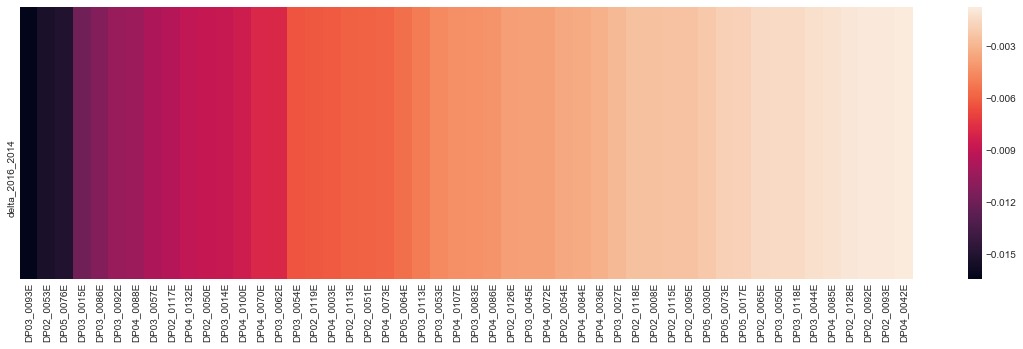

In [19]:
#bottom_50 correlated variables for 2016_2014
bottom_50_variable = correlations.sort_values('delta_2016_2014',ascending=True)[5:55].index
bottom_50_value = correlations.sort_values('delta_2016_2014',ascending=True)[5:55].delta_2016_2014.values

# mask = np.zeros_like(correlations[top_50_variable][-5:], dtype=np.bool)
# mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(20,5))


sns.heatmap(correlations[bottom_50_variable].iloc[-2:-1])

plt.show()

**Positive correlations are way stronger than negative ones. The bottom 50 correlations all range around 0, so there are not many highly inverse correlated features to delta_2016_2014. So let's focus on the top 50 positively correlated features.** 


In [20]:
#print out the top related features
variables = pd.read_csv('variable_label.csv')
for i,j in zip(top_50_variable,top_50_value):
    label = variables[variables.variable==i].label.values[0]
    print("'{}' # {} # Score # {}".format(i,label,j))


'DP03_0010E' # EMPLOYMENT STATUS!!Females 16 years and over # Score # 0.027870224571758685
'DP04_0037E' # BEDROOMS!!Total housing units # Score # 0.026609355470457924
'DP04_0006E' # UNITS IN STRUCTURE!!Total housing units # Score # 0.026609355470457924
'DP04_0001E' # HOUSING OCCUPANCY!!Total housing units # Score # 0.026609355470457924
'DP02_0002E' # HOUSEHOLDS BY TYPE!!Total households!!Family households (families) # Score # 0.026133729816485384
'DP03_0096E' # HEALTH INSURANCE COVERAGE!!Civilian noninstitutionalized population!!With health insurance coverage # Score # 0.025041652338407768
'DP05_0037E' # RACE!!One race!!American Indian and Alaska Native!!Navajo tribal grouping # Score # 0.0239200419406478
'DP02_0004E' # HOUSEHOLDS BY TYPE!!Total households!!Married-couple family # Score # 0.023575202146176033
'DP03_0007E' # EMPLOYMENT STATUS!!Population 16 years and over!!Not in labor force # Score # 0.023499105700565685
'DP02_0019E' # RELATIONSHIP!!Population in households!!Spouse # S

** Clearly there are plenty of redundant and interactive features. For example, total population is recorded in both Race table and Ancestry table. Another example is under 'Sex and Age', total females, total males and total population are all there. We need to reduce some using common sense. **

# Goal -  top 20 correlated features 
- **minimize dependent/redundant feature**
- **engineer interactive features**

### Helper class to generate interactive feature pd.series

In [222]:
class Interactive:
    
    def __init__(self,features,data): # features list for interactive, data is df
        self.features = features
        self.data = data

        
    def show(self):
         print('Interactive Features : {}\n Length of data: {}'.format(self.features,len(self.data)))
               
    def addition(self):
        initial_feature = self.features[0]
        sum_feature = self.data[initial_feature].copy()
        for feature in self.features[1:]:
            sum_feature += self.data[feature]
        return sum_feature.rename('add_{}'.format(self.features)) #return is pd.series
               
    def subtraction(self):
        minuend = self.features[0]
        difference = self.data[minuend].copy()
        for feature in self.features[1:]:
            difference -= self.data[feature]
        return difference.rename('sub_{}'.format(self.features)) #return is pd.series        
    
    def product(self):
        number = self.features[0]
        product = self.data[number].copy()
        for feature in self.features[1:]:
            product *= self.data[feature]
        return product.rename('product_{}'.format(self.features)) #return is pd.series after multiplication
               
    def division (self):
        nominator = self.features[0]
        division = self.data[nominator].copy()
        for feature in self.features[1:]:
            division /= self.data[feature]
        return division.rename('divd_{}'.format(self.features)) #return is pd.series after division   
        

## 1st Round of feature selection

In [223]:
#sort these features by group 
top_feature_by_group = {'DP02':[],'DP03':[],'DP04':[],'DP05':[]}
for i,j in zip(top_50_variable,top_50_value):
    label = variables[variables.variable==i].label.values[0]
    if 'DP02' in i:
        top_feature_by_group['DP02'].append((i,j,label))
    elif 'DP03' in i:
        top_feature_by_group['DP03'].append((i,j,label))
    elif 'DP04' in i:
        top_feature_by_group['DP04'].append((i,j,label))
    elif 'DP05' in i:
        top_feature_by_group['DP05'].append((i,j,label))
        

In [224]:
top_feature_by_group['DP02']

[('DP02_0058E',
  0.31786326911400747,
  'EDUCATIONAL ATTAINMENT!!Population 25 years and over'),
 ('DP02_0068E',
  0.30758700853633641,
  'VETERAN STATUS!!Civilian population 18 years and over'),
 ('DP02_0110E',
  0.28906298913850043,
  'LANGUAGE SPOKEN AT HOME!!Population 5 years and over'),
 ('DP02_0017E', 0.28366465431333349, 'RELATIONSHIP!!Population in households'),
 ('DP02_0122E', 0.28169176747676722, 'ANCESTRY!!Total population'),
 ('DP02_0065E',
  0.25829134408628374,
  'EDUCATIONAL ATTAINMENT!!Population 25 years and over!!Graduate or professional degree'),
 ('DP02_0064E',
  0.25547930462390012,
  "EDUCATIONAL ATTAINMENT!!Population 25 years and over!!Bachelor's degree"),
 ('DP02_0001E', 0.23433168244791575, 'HOUSEHOLDS BY TYPE!!Total households'),
 ('DP02_0018E',
  0.23433168244791575,
  'RELATIONSHIP!!Population in households!!Householder'),
 ('DP02_0111E',
  0.22530805385898775,
  'LANGUAGE SPOKEN AT HOME!!Population 5 years and over!!English only'),
 ('DP02_0014E',
  0.22

- Group DP02
    -Redundant
        - ('DP02_0058E',0.31786326911400747,'EDUCATIONAL ATTAINMENT!!Population 25 years and over') 
        - ('DP02_0068E',0.30758700853633641,'VETERAN STATUS!!Civilian population 18 years and over')
        - ('DP02_0017E', 0.28366465431333349, 'RELATIONSHIP!!Population in households')
        - ('DP02_0122E', 0.28169176747676722, 'ANCESTRY!!Total population')
        - ('DP02_0018E',0.23433168244791575,'RELATIONSHIP!!Population in households!!Householder')
        - ('DP02_0110E',0.28906298913850043,'LANGUAGE SPOKEN AT HOME!!Population 5 years and over')
        
    -Interactive
        - ('DP02_0065E',0.25829134408628374,'EDUCATIONAL ATTAINMENT!!Population 25 years and over!!Graduate or professional degree')
        - ('DP02_0064E',0.25547930462390012,"EDUCATIONAL ATTAINMENT!!Population 25 years and over!!Bachelor's degree")

- After going back to the census description, I decided to keep 
- ('DP02_0058E',0.31786326911400747,'EDUCATIONAL ATTAINMENT!! Population 25 years and over') 
- ('DP02_0111E',
  0.22530805385898775,
  'LANGUAGE SPOKEN AT HOME!!Population 5 years and over!!English only')
- ('DP02_0014E',
  0.22131843350346428,
  'HOUSEHOLDS BY TYPE!!Total households!!Households with one or more people 65 years and over')
- ('DP02_0001E', 0.23433168244791575, 'HOUSEHOLDS BY TYPE!!Total households')
-('DP02_0094E',
  0.20509378243131418,
  'U.S. CITIZENSHIP STATUS!!Foreign-born population!!Naturalized U.S. citizen')
- 
Examine if the sum of these two interactive features has a better correlation score to decide which if we use the sum or each feature individually. 
        

In [225]:
top_feature_by_group['DP03']

[('DP03_0096E',
  0.30811635347816796,
  'HEALTH INSURANCE COVERAGE!!Civilian noninstitutionalized population!!With health insurance coverage'),
 ('DP03_0001E',
  0.3004936902305872,
  'EMPLOYMENT STATUS!!Population 16 years and over'),
 ('DP03_0095E',
  0.28635610457041261,
  'HEALTH INSURANCE COVERAGE!!Civilian noninstitutionalized population'),
 ('DP03_0010E',
  0.28077271479533,
  'EMPLOYMENT STATUS!!Females 16 years and over'),
 ('DP03_0098E',
  0.2453535721660717,
  'HEALTH INSURANCE COVERAGE!!Civilian noninstitutionalized population!!With health insurance coverage!!With public coverage'),
 ('DP03_0027E',
  0.23853722434902447,
  'OCCUPATION!!Civilian employed population 16 years and over!!Management, business, science, and arts occupations'),
 ('DP03_0047E',
  0.23663581289231184,
  'CLASS OF WORKER!!Civilian employed population 16 years and over!!Private wage and salary workers'),
 ('DP03_0051E',
  0.23433168244791575,
  'INCOME AND BENEFITS (IN 2012 INFLATION-ADJUSTED DOLLARS)

Group 3 
- Redundant
    -work_related 
        - ('DP03_0027E',0.23853722434902447,'OCCUPATION!!Civilian employed population 16 years and over!!Management, business, science, and arts occupations')
        - ('DP03_0047E',0.23663581289231184,'CLASS OF WORKER!!Civilian employed population 16 years and over!!Private wage and salary workers')
    -labor_related
        - ('DP03_0010E',0.28077271479533,'EMPLOYMENT STATUS!!Females 16 years and over') 
        - ('DP03_0004E',
  0.23312944805011085,'EMPLOYMENT STATUS!!Population 16 years and over!!In labor force!!Civilian labor force!!Employed'),
        - ('DP03_0007E', 0.2295740434866454,'EMPLOYMENT STATUS!!Population 16 years and over!!Not in labor force'),
        - ('DP03_0008E',0.22688699409089103,'EMPLOYMENT STATUS!!Civilian labor force'),
        - ('DP03_0002E',0.22315230207928477,'EMPLOYMENT STATUS!!Population 16 years and over!!In labor force'),
        - ('DP03_0012E',0.19802878556114181,'EMPLOYMENT STATUS!!Females 16 years and over!!In labor force!!Civilian labor force'),
        - ('DP03_0011E',0.19673936350393151,'EMPLOYMENT STATUS!!Females 16 years and over!!In labor force')
     
    
- Interactive
    - ('DP03_0095E',0.28635610457041261,'HEALTH INSURANCE COVERAGE!!Civilian noninstitutionalized population') this is just population
    - ('DP03_0096E',0.30811635347816796,'HEALTH INSURANCE COVERAGE!!Civilian noninstitutionalized population!!With   health insurance coverage')
    - ('DP03_0098E',0.2453535721660717,'HEALTH INSURANCE COVERAGE!!Civilian noninstitutionalized population!!With health insurance coverage!!With public coverage') this is a subset of 'DP03_0096E'

Group3
Keep - 
- ('DP03_0027E',0.23853722434902447,'OCCUPATION!!Civilian employed population 16 years and over!!Management, business, science, and arts occupations')
- ('DP03_0004E',
  0.23312944805011085,'EMPLOYMENT STATUS!!Population 16 years and over!!In labor force!!Civilian labor force!!Employed')
  
-('DP03_0051E',
  0.23433168244791575,
  'INCOME AND BENEFITS (IN 2012 INFLATION-ADJUSTED DOLLARS)!!Total households')

-('DP03_0096E',0.30811635347816796,'HEALTH INSURANCE COVERAGE!!Civilian noninstitutionalized population!!With   health insurance coverage')  

In [226]:
top_feature_by_group['DP04']

[('DP04_0124E', 0.25640317982391275, 'GROSS RENT!!Occupied units paying rent'),
 ('DP04_0046E',
  0.25623413336241591,
  'HOUSING TENURE!!Occupied housing units!!Renter-occupied'),
 ('DP04_0075E',
  0.23433168244791575,
  'OCCUPANTS PER ROOM!!Occupied housing units'),
 ('DP04_0049E',
  0.23433168244791575,
  'YEAR HOUSEHOLDER MOVED INTO UNIT!!Occupied housing units'),
 ('DP04_0071E',
  0.23433168244791575,
  'SELECTED CHARACTERISTICS!!Occupied housing units'),
 ('DP04_0044E', 0.23433168244791575, 'HOUSING TENURE!!Occupied housing units'),
 ('DP04_0002E',
  0.23433168244791575,
  'HOUSING OCCUPANCY!!Total housing units!!Occupied housing units'),
 ('DP04_0076E',
  0.2144496619258412,
  'OCCUPANTS PER ROOM!!Occupied housing units!!1.00 or less'),
 ('DP04_0037E', 0.20787953053787492, 'BEDROOMS!!Total housing units'),
 ('DP04_0001E', 0.20787953053787492, 'HOUSING OCCUPANCY!!Total housing units'),
 ('DP04_0006E',
  0.20787953053787492,
  'UNITS IN STRUCTURE!!Total housing units')]

Group 4
- Keeper
    - ('DP04_0124E', 0.25640317982391275, 'GROSS RENT!!Occupied units paying rent')
    
    -('DP04_0002E',
  0.23433168244791575,
  'HOUSING OCCUPANCY!!Total housing units!!Occupied housing units')

In [227]:

top_feature_by_group['DP05']

[('DP05_0024E',
  0.28544666527685825,
  'SEX AND AGE!!Total population!!18 years and over!!Female'),
 ('DP05_0028E', 0.28169176747676722, 'RACE!!Total population'),
 ('DP05_0001E', 0.28169176747676722, 'SEX AND AGE!!Total population'),
 ('DP05_0029E', 0.26435156377167862, 'RACE!!Total population!!One race'),
 ('DP05_0031E', 0.26435156377167862, 'RACE!!One race'),
 ('DP05_0003E', 0.25683033752130507, 'SEX AND AGE!!Total population!!Female'),
 ('DP05_0002E', 0.24442427702028213, 'SEX AND AGE!!Total population!!Male'),
 ('DP05_0025E',
  0.23335542059041767,
  'SEX AND AGE!!Total population!!65 years and over'),
 ('DP05_0071E',
  0.22752303907640481,
  'HISPANIC OR LATINO AND RACE!!Total population!!Not Hispanic or Latino'),
 ('DP05_0062E',
  0.2136407510042507,
  'Race alone or in combination with one or more other races!!Total population!!Asian'),
 ('DP05_0026E',
  0.2063628745300895,
  'SEX AND AGE!!Total population!!65 years and over!!Male'),
 ('DP05_0027E',
  0.20545665343458505,
  '

Group5:
Keep 
- ('DP05_0001E', 0.28169176747676722, 'SEX AND AGE!!Total population')
- ('DP05_0025E',
  0.23335542059041767,
  'SEX AND AGE!!Total population!!65 years and over'),
- ('DP05_0071E',
  0.22752303907640481,
  'HISPANIC OR LATINO AND RACE!!Total population!!Not Hispanic or Latino'),
- ('DP05_0062E',
  0.2136407510042507,
  'Race alone or in combination with one or more other races!!Total population!!Asian')


### Things to do 
- remove redundant features from df
- explore if we should use sum for interactive features and make corresponding change

In [228]:
## explore if the addition of two features 'DP02_0065E','DP02_0064E' makes it better correlated than any sinble one
features_to_sum = ['DP02_0065E','DP02_0064E']
pd_add = Interactive(features_to_sum,df).addition()
df_comp=pd.concat([pd_add,df[['DP02_0065E','DP02_0064E','delta_2016_2014']]],axis=1)
df_comp.corr()

,"add_['DP02_0065E', 'DP02_0064E']",DP02_0065E,DP02_0064E,delta_2016_2014
"add_['DP02_0065E', 'DP02_0064E']",1.000000,0.762542,0.864029,0.313208
DP02_0065E,0.762542,1.000000,0.333161,0.258291
DP02_0064E,0.864029,0.333161,1.000000,0.255479
delta_2016_2014,0.313208,0.258291,0.255479,1.000000


** Clearly, addition of DP02_0065E and DP02_0064E has a stronger correlation to delta_2016_2014 than each alone. Let's drop out DP02_0065E and DP02_0064E and use the addition.**

In [229]:
# pull features to keep (note DP02_0065E and DP02_0064E is not there)
features_to_keep = ['DP02_0058E','DP02_0111E','DP02_0014E','DP02_0001E','DP02_0094E',
                    'DP03_0004E','DP03_0051E','DP03_0096E','DP03_0027E',
                    'DP04_0124E','DP04_0002E',
                    'DP05_0001E','DP05_0025E','DP05_0071E','DP05_0062E']

#calculate features need to be removed
feature_to_remove = list(set(top_50_variable)-set(features_to_keep))  
    
#drop those features    
df_fs_1 = df.copy().drop(feature_to_remove,axis=1)

#add the interactive features
df_fs_1=pd.concat([df_fs_1,pd_add],axis=1)

In [230]:
print(len(df_fs_1.columns),len(df.columns),len(feature_to_remove))

191 225 35


## 2nd Round of feature selection

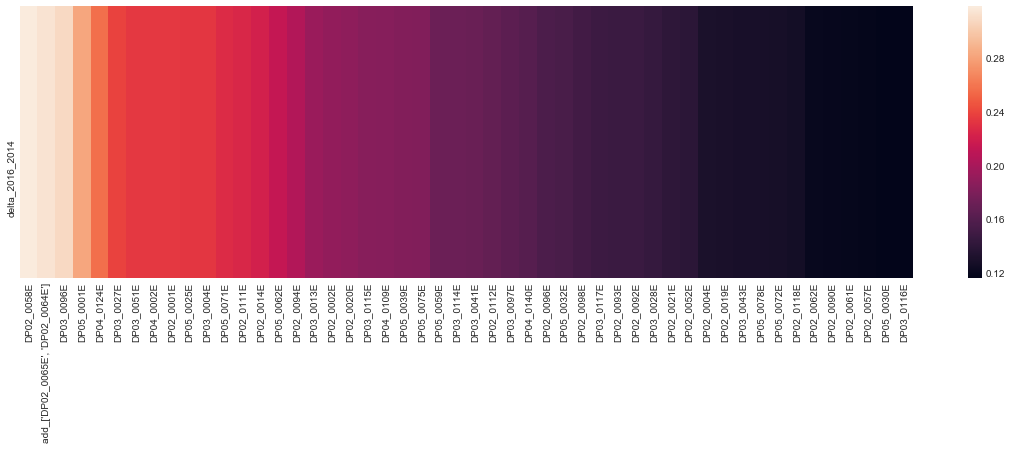

In [231]:
correlations = df_fs_1.corr()
#top_50 correlated variables for 2016_2014
top_50_variable = correlations.sort_values('delta_2016_2014',ascending=False)[5:55].index
top_50_value = correlations.sort_values('delta_2016_2014',ascending=False)[5:55].delta_2016_2014.values

# mask = np.zeros_like(correlations[top_50_variable][-5:], dtype=np.bool)
# mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(20,5))


sns.heatmap(correlations[top_50_variable].iloc[-3:-2])

plt.show()

In [232]:
features_to_keep = ['DP02_0058E','DP02_0111E','DP02_0014E','DP02_0001E','DP02_0094E',
                    'DP03_0004E','DP03_0051E','DP03_0096E','DP03_0027E',
                    'DP04_0124E','DP04_0002E',
                    'DP05_0001E','DP05_0025E','DP05_0071E','DP05_0062E',"add_['DP02_0065E', 'DP02_0064E']"]

# features_to_sum = ['DP02_0065E','DP02_0064E']

#print out the top related features
variables = pd.read_csv('variable_label.csv')
top_feature_by_group = {'DP02':[],'DP03':[],'DP04':[],'DP05':[]}

for i,j in zip(top_50_variable,top_50_value):
#     print(i,j)
    if i not in features_to_keep:
#         print('not under features_to_keep')
        label = variables[variables.variable==i].label.values[0]
#         print(i)
        if 'DP02' in i:
            top_feature_by_group['DP02'].append((i,j,label))
        elif 'DP03' in i:
            top_feature_by_group['DP03'].append((i,j,label))
        elif 'DP04' in i:
            top_feature_by_group['DP04'].append((i,j,label))
        elif 'DP05' in i:
            top_feature_by_group['DP05'].append((i,j,label))
    else:
#         print(i)
#         print('under else')
        pass
    
    
        

In [233]:
top_feature_by_group['DP02']

[('DP02_0002E',
  0.18965854215842609,
  'HOUSEHOLDS BY TYPE!!Total households!!Family households (families)'),
 ('DP02_0020E',
  0.18821853132982247,
  'RELATIONSHIP!!Population in households!!Child'),
 ('DP02_0112E',
  0.16760577503156615,
  'LANGUAGE SPOKEN AT HOME!!Population 5 years and over!!Language other than English'),
 ('DP02_0096E',
  0.15685457342393891,
  'YEAR OF ENTRY!!Population born outside the United States'),
 ('DP02_0098E',
  0.15141164961800954,
  'YEAR OF ENTRY!!Population born outside the United States!!Native!!Entered 2010 or later'),
 ('DP02_0093E',
  0.14701934637828426,
  'U.S. CITIZENSHIP STATUS!!Foreign-born population'),
 ('DP02_0092E',
  0.14701934637828426,
  'PLACE OF BIRTH!!Total population!!Foreign born'),
 ('DP02_0021E',
  0.14107847111210853,
  'RELATIONSHIP!!Population in households!!Other relatives'),
 ('DP02_0052E',
  0.13970408483425684,
  'SCHOOL ENROLLMENT!!Population 3 years and over enrolled in school'),
 ('DP02_0004E',
  0.13045659004224883

Note:
Many features are redundant or sub-categories of feature that has been included, for example
- ('DP02_0002E',
  0.18965854215842609,
  'HOUSEHOLDS BY TYPE!!Total households!!Family households (families)')
- ('DP02_0004E',
  0.13045659004224883,
  'HOUSEHOLDS BY TYPE!!Total households!!Married-couple family')
They are all sub-categories of one included feature 'DP02_0001E' # HOUSEHOLDS BY TYPE!!Total households # Score # 0.23433168244791575. Clearly the fact total is more correlated than any single says the total households matters not any sub-catergorical one. These need to be removed. The same logic can also apply to populations and stuff showing up in this list. 

** After examination, I decide to keep the following features:**
- ('DP02_0020E',
  0.18821853132982247,
  'RELATIONSHIP!!Population in households!!Child')
- ('DP02_0098E',
  0.15141164961800954,
  'YEAR OF ENTRY!!Population born outside the United States!!Native!!Entered 2010 or later')
  

In [234]:
top_feature_by_group['DP03']

[('DP03_0013E',
  0.19346764487526047,
  'EMPLOYMENT STATUS!!Females 16 years and over!!In labor force!!Civilian labor force!!Employed'),
 ('DP03_0115E',
  0.18477610909431541,
  'HEALTH INSURANCE COVERAGE!!Civilian noninstitutionalized population 18 to 64 years!!Not in labor force:!!With health insurance coverage'),
 ('DP03_0114E',
  0.17175354022311298,
  'HEALTH INSURANCE COVERAGE!!Civilian noninstitutionalized population 18 to 64 years!!Not in labor force:'),
 ('DP03_0041E',
  0.17069224381357748,
  'INDUSTRY!!Civilian employed population 16 years and over!!Professional, scientific, and management, and administrative and waste management services'),
 ('DP03_0097E',
  0.16421745057334486,
  'HEALTH INSURANCE COVERAGE!!Civilian noninstitutionalized population!!With health insurance coverage!!With private health insurance'),
 ('DP03_0117E',
  0.14841432517474046,
  'HEALTH INSURANCE COVERAGE!!Civilian noninstitutionalized population 18 to 64 years!!Not in labor force:!!With health ins

**Interactive Sum**
- ('DP03_0028E',
  0.14518839799941088,
  'OCCUPATION!!Civilian employed population 16 years and over!!Service occupations')
This feature could be summed with another existing feature
- 'DP03_0027E' # OCCUPATION!!Civilian employed population 16 years and over!!Management, business, science, and arts occupations # Score # 0.23853722434902447

**Then we can compare which one is more highly correlated**

In [235]:
top_feature_by_group['DP04']

[('DP04_0109E',
  0.18440439447396242,
  'SELECTED MONTHLY OWNER COSTS AS A PERCENTAGE OF HOUSEHOLD INCOME (SMOCAPI)!!Housing units with a mortgage (excluding units where SMOCAPI cannot be computed)!!Less than 20.0 percent'),
 ('DP04_0140E',
  0.16138040935941092,
  'GROSS RENT AS A PERCENTAGE OF HOUSEHOLD INCOME (GRAPI)!!Occupied units paying rent (excluding units where GRAPI cannot be computed)!!35.0 percent or more')]

- Keep and try to sum

- ('DP04_0109E',
  0.18440439447396242,
  'SELECTED MONTHLY OWNER COSTS AS A PERCENTAGE OF HOUSEHOLD INCOME (SMOCAPI)!!Housing units with a mortgage (excluding units where SMOCAPI cannot be computed)!!Less than 20.0 percent')
  
-('DP04_0140E',
  0.16138040935941092,
  'GROSS RENT AS A PERCENTAGE OF HOUSEHOLD INCOME (GRAPI)!!Occupied units paying rent (excluding units where GRAPI cannot be computed)!!35.0 percent or more')


In [236]:
top_feature_by_group['DP05']

[('DP05_0039E', 0.18280529061689588, 'RACE!!One race!!Asian'),
 ('DP05_0075E',
  0.18219666768812795,
  'HISPANIC OR LATINO AND RACE!!Total population!!Not Hispanic or Latino!!Asian alone'),
 ('DP05_0059E',
  0.17178142345840053,
  'Race alone or in combination with one or more other races!!Total population!!White'),
 ('DP05_0032E', 0.15517017299003141, 'RACE!!One race!!White'),
 ('DP05_0078E',
  0.12899991540442302,
  'HISPANIC OR LATINO AND RACE!!Total population!!Not Hispanic or Latino!!Two or more races'),
 ('DP05_0072E',
  0.12814669935075096,
  'HISPANIC OR LATINO AND RACE!!Total population!!Not Hispanic or Latino!!White alone'),
 ('DP05_0030E',
  0.11658834671971818,
  'RACE!!Total population!!Two or more races')]

**Keep and try to sum**
- ('DP05_0059E',
  0.17178142345840053,
  'Race alone or in combination with one or more other races!!Total population!!White')
- ('DP05_0062E' # Race alone or in combination with one or more other races!!Total population!!Asian # Score # 0.2136407510042507)

### actions on df_fs_1
- explore redundant features and decide which one to add 
- new_features_to_keep = ['DP02_0020E','DP02_0098E'] remove redundant features 


In [237]:
#explore interactive features
comp_feature=['DP03_0028E','DP03_0027E']
# comp_feature =['DP04_0109E','DP04_0140E']
# comp_feature= ['DP05_0059E','DP05_0062E']

pd_add = Interactive(comp_feature,df).addition()
columns_comp = comp_feature + ['delta_2016_2014']
df_comp=pd.concat([pd_add,df[columns_comp]],axis=1)
df_comp.corr()

,"add_['DP03_0028E', 'DP03_0027E']",DP03_0028E,DP03_0027E,delta_2016_2014
"add_['DP03_0028E', 'DP03_0027E']",1.000000,0.630799,0.832123,0.266808
DP03_0028E,0.630799,1.000000,0.094570,0.145188
DP03_0027E,0.832123,0.094570,1.000000,0.238537
delta_2016_2014,0.266808,0.145188,0.238537,1.000000


In [238]:
# higher add to the df_fs_1
df_fs_2=pd.concat([df_fs_1.copy(),pd_add],axis=1)

In [239]:
#explore interactive features
comp_feature =['DP04_0109E','DP04_0140E']
# comp_feature= ['DP05_0059E','DP05_0062E']

pd_add = Interactive(comp_feature,df).addition()
columns_comp = comp_feature + ['delta_2016_2014']
df_comp=pd.concat([pd_add,df[columns_comp]],axis=1)
df_comp.corr()

,"add_['DP04_0109E', 'DP04_0140E']",DP04_0109E,DP04_0140E,delta_2016_2014
"add_['DP04_0109E', 'DP04_0140E']",1.000000,0.748297,0.726451,0.234685
DP04_0109E,0.748297,1.000000,0.087726,0.184404
DP04_0140E,0.726451,0.087726,1.000000,0.161380
delta_2016_2014,0.234685,0.184404,0.161380,1.000000


In [240]:
# higher add to the df_fs_2
df_fs_2=pd.concat([df_fs_2,pd_add],axis=1)

In [241]:
#explore interactive features
comp_feature= ['DP05_0059E','DP05_0062E']

pd_add = Interactive(comp_feature,df).addition()
columns_comp = comp_feature + ['delta_2016_2014']
df_comp=pd.concat([pd_add,df[columns_comp]],axis=1)
df_comp.corr()

,"add_['DP05_0059E', 'DP05_0062E']",DP05_0059E,DP05_0062E,delta_2016_2014
"add_['DP05_0059E', 'DP05_0062E']",1.000000,0.956294,0.353780,0.223612
DP05_0059E,0.956294,1.000000,0.064821,0.171781
DP05_0062E,0.353780,0.064821,1.000000,0.213641
delta_2016_2014,0.223612,0.171781,0.213641,1.000000


In [242]:
# higher add to the df_fs_2
df_fs_2=pd.concat([df_fs_2,pd_add],axis=1)

In [243]:
#features_to_keep after the first round note I need to remove DP_03_0027E since now it is combined 
#in the new feature add_['DP03_0028E', 'DP03_0027E'] 
features_to_keep = ['DP02_0058E','DP02_0111E','DP02_0014E','DP02_0001E','DP02_0094E',
                    'DP03_0004E','DP03_0051E','DP03_0096E', #'DP03_0027E',
                    'DP04_0124E','DP04_0002E',
                    'DP05_0001E','DP05_0025E','DP05_0071E','DP05_0062E',"add_['DP02_0065E', 'DP02_0064E']"]

new_features_to_keep = ['DP02_0020E','DP02_0098E']
#features to keep after the 2 nd round
features_to_keep = features_to_keep + new_features_to_keep

#calculate features need to be removed
feature_to_remove = list(set(top_50_variable)-set(features_to_keep))  

In [244]:
#drop those features    
df_fs_2 = df_fs_2.drop(feature_to_remove,axis=1)

In [245]:
print(len(df_fs_2.columns),len(df_fs_1.columns),len(feature_to_remove),len(features_to_keep)+3)

161 191 33 20


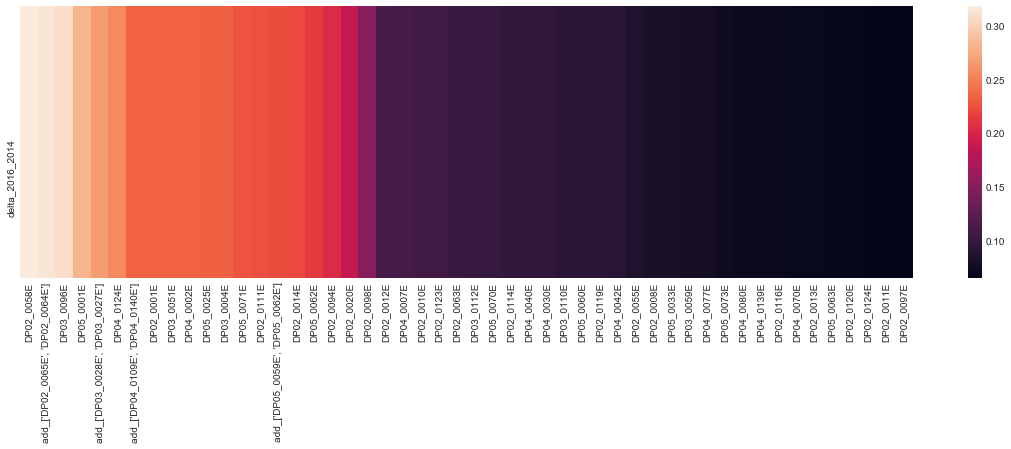

In [246]:
correlations = df_fs_2.corr()
#top_50 correlated variables for 2016_2014
top_50_variable = correlations.sort_values('delta_2016_2014',ascending=False)[5:55].index
top_50_value = correlations.sort_values('delta_2016_2014',ascending=False)[5:55].delta_2016_2014.values

# mask = np.zeros_like(correlations[top_50_variable][-5:], dtype=np.bool)
# mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(20,5))


sns.heatmap(correlations[top_50_variable].iloc[-6:-5])

plt.show()

** So far we have selected 20 independent or interactive features. Let's save df_fs_2 to csv.**

In [247]:
#Now the new features_to_keep(at this point, it is our final 20 features to keep)
# features_to_keep = ['DP02_0058E',
#  'DP02_0111E',
#  'DP02_0014E',
#  'DP02_0001E',
#  'DP02_0094E',
#  'DP03_0004E',
#  'DP03_0051E',
#  'DP03_0096E',
#  'DP04_0124E',
#  'DP04_0002E',
#  'DP05_0001E',
#  'DP05_0025E',
#  'DP05_0071E',
#  'DP05_0062E',
#  "add_['DP02_0065E', 'DP02_0064E']",
#  'DP02_0020E',
#  'DP02_0098E',
# "add_['DP03_0028E', 'DP03_0027E']",
#  "add_['DP04_0109E', 'DP04_0140E']",
# "add_['DP05_0059E', 'DP05_0062E']" 
#  ]



In [248]:
df_fs_2.to_csv('process_data/fs_2_analytic_table.csv',index=False)